In [38]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import h5py 

In [39]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

sample = samples[1]
sample_short = ''.join(sample.split('.')[:-1])
sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
sample_pool = sample.replace('-', '').replace('.', '')


In [40]:
experiment_id = '427'

In [41]:
# Fasta file with the peptides and the metadata in the samples (longlist derived)
filter_fasta_long = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_query_peptides_kmers.fa'
print(filter_fasta_long)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_query_peptides_kmers.fa


In [42]:
# the experiment/ peptide table 
sample_experiment_peptides = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_experiments_per_peptide.tsv'
print(sample_experiment_peptides)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_experiments_per_peptide.tsv


In [43]:
### FIX ###
# Fasta file with the peptides and the metadata in the samples (longlist derived)
filter_fasta_long_with_flag = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_query_peptides_kmers_flag_jx.fa'
print(filter_fasta_long_with_flag)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_query_peptides_kmers_flag_jx.fa


In [44]:
### SHORTCUT FOR ONE EXPERIMENT ### (Should use the experiment file to extract the name of the file)
# MHC File 
sample_MHC = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv'

In [45]:
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


# Process experiment outputs (fasta, MHC, experiment)

In [18]:
# Process the experiment/ peptide table file according to the experiment wanted 
downsample_pept_exp = []
with open(sample_experiment_peptides) as fp:
    for idx, line in enumerate(fp.readlines()):
        if idx:
            sample_peptide_id = line.split()[0]
            sample_experiment_ids = line.split()[2].split(';')
            if experiment_id in sample_experiment_ids:
                downsample_pept_exp.append(sample_peptide_id)
            
downsample_pept_exp = pd.DataFrame(downsample_pept_exp, columns = ['>pepID'])

In [19]:
len(downsample_pept_exp)

165876

In [20]:
# # Process the ORIGINAL flag file with the peptides and the metadata in the samples (longlist derived)
# # Downsample for the experiement of interest 

# samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
#         'TCGA-C8-A12P-01A-11R-A115-07.all', 
#         'TCGA-AO-A0JM-01A-21R-A056-07.all', 
#         'TCGA-A2-A0SX-01A-12R-A084-07.all',
#         'TCGA-A2-A0D2-01A-21R-A034-07.all']

# all_fasta = []

# for sample in samples:
#     sample_short = ''.join(sample.split('.')[:-1])
#     sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
#     sample_pool = sample.replace('-', '').replace('.', '')

#     meta = []
#     peptides = []
#     with open(filter_fasta_long) as fp:
#         for idx, line in enumerate(fp.readlines()):
#             #print(idx)
#             if idx == 0: 
#                 header = [field.split('-')[0] for field in line.replace('\n', '').split(';')]
#             if '>' in line:
#                 meta_fields = [field.split('-')[1] for field in line.replace('\n', '').split(';')]
#                 target_pep_id = meta_fields[0]
#                 meta.append(meta_fields)
#             elif ('>' not in line):
#                 peptides.append(line.replace('\n', ''))

#     df_filter_fasta_long = pd.DataFrame(meta)
#     df_filter_fasta_long['peptide'] = peptides #optional
#     df_filter_fasta_long.columns = header + ['peptide'] 
#     df_filter_fasta_long = df_filter_fasta_long.merge(downsample_pept_exp, 
#                                                       on = '>pepID', how = 'right')
#     df_filter_fasta_long = df_filter_fasta_long.drop_duplicates()
#     df_filter_fasta_long['sample'] = sample_pool
#     all_fasta.append(df_filter_fasta_long)
#     print(df_filter_fasta_long.shape)
#     print(f'done with sample {sample_pool}')

# all_fasta_orig = pd.concat(all_fasta, axis = 0 )

In [21]:
#TODO = SOLVE THE ISSUE WITH THE EMPTY LINES 

In [38]:
# Process the Fasta flag file with the peptides and the metadata in the samples (longlist derived)
# Downsample for the experiement of interest 

samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

all_fasta = []

for sample in samples:
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_pool = sample.replace('-', '').replace('.', '')
    filter_fasta_long_with_flag = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}_query_peptides_kmers_flag_jx.fa'
    print(filter_fasta_long_with_flag)

    meta = []
    peptides = []
    with open(filter_fasta_long_with_flag) as fp:
        for idx, line in enumerate(fp.readlines()):
            if idx == 0: 
                header = [field.split('-')[0] for field in line.replace('\n', '').split(';')]
            if '>' in line:
                meta_fields = [field.split('-')[1] for field in line.replace('\n', '').split(';')]
                target_pep_id = meta_fields[0]
                meta.append(meta_fields)
            elif ('>' not in line) and (line):
                peptides.append(line.replace('\n', ''))

    df_filter_fasta_long = pd.DataFrame(meta)
    df_filter_fasta_long['peptide'] = peptides #optional
    df_filter_fasta_long.columns = header + ['peptide'] 
    df_filter_fasta_long = df_filter_fasta_long.merge(downsample_pept_exp, 
                                                      on = '>pepID', how = 'right')
    df_filter_fasta_long = df_filter_fasta_long.drop_duplicates()
    df_filter_fasta_long['sample'] = sample_pool
    all_fasta.append(df_filter_fasta_long)
    print(df_filter_fasta_long.shape)
    print(f'done with sample {sample_pool}')

all_fasta = pd.concat(all_fasta, axis = 0 )

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07_query_peptides_kmers_flag_jx.fa
(181197, 13)
done with sample TCGABHA18V01A11RA12D07all
/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07_query_peptides_kmers_flag_jx.fa
LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRGAASPQSGSLGRPWEERGH

LQSAAWAAQGYSCGRTVVGRWMPV

In [33]:
all_fasta.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,origin,peptide,sample
0,0,56,1,0,1,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all
1,0,57,1,0,1,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all
2,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all
3,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all
4,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,2exons,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,TCGABHA18V01A11RA12D07all


In [40]:
all_fasta.loc[all_fasta['kmer'] == 'SPQSGSLGR', :]

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,origin,peptide,sample
63683,67975,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,2exons,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAC8A12P01A11RA11507all
59808,69811,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,2exons,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0SX01A12RA08407all
59809,69813,56,0,0,1,ENSG00000128159.12,50221274_50220015,SPQSGSLGR,0,0,2exons,LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRG...,TCGAA2A0SX01A12RA08407all
58114,68616,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,2exons,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0D201A21RA03407all
58115,68617,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,2exons,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0D201A21RA03407all
58116,68618,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,2exons,VTSPGPEHPEGGQGCDSGSAEQHSPAWDGWNRPGLLTPQPLKPLAV...,TCGAA2A0D201A21RA03407all
58117,68619,56,0,0,1,ENSG00000128159.12,50221274_50220015,SPQSGSLGR,0,0,2exons,LQSAAWAAQGYSCGRTVVGRWMPVAPPRGRLCSPHTHPGVLLWRRG...,TCGAA2A0D201A21RA03407all


In [41]:
# Process the MHC binding fileS

samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']
all_mhc = []
for sample in samples:
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_pool = sample.replace('-', '').replace('.', '')
    sample_MHC = f'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{sample_short}.all/commit_d4aee54_GTEXcore/G_{sample_short}.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv'
    print(sample_MHC)
    MHC = pd.read_csv(sample_MHC, sep = '\t')
    MS_min = MHC.groupby(['kmer', 
                         ]).min()
    MS_min = MS_min[['percentile_rank', 'affinity']].reset_index()
#     MS_min = MS_min.rename(
#         {'percentile_rank': f'percentile_rank_{sample_pool}', 
#          'affinity': f'affinity_{sample_pool}'},
#         axis = 1)
    MS_min['sample'] = sample_pool
    display(MS_min.head(3))
    display(MS_min.shape)
    all_mhc.append(MS_min)

all_mhc = pd.concat(all_mhc, axis = 0 )


# MS_result = all_samples[0]
# for i in np.arange(1, len(all_samples)):
#     MS_result = MS_result.merge(all_samples[i], on = 'kmer', how = 'outer')

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv


,kmer,percentile_rank,affinity,sample
0,AAAALQQHS,8.5,17394.11,TCGABHA18V01A11RA12D07all
1,AAADGVLSV,0.5,115.36,TCGABHA18V01A11RA12D07all
2,AAADGWTMG,1.8,5876.76,TCGABHA18V01A11RA12D07all


(21363, 4)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-C8-A12P-01A-11R-A115-07.all/commit_d4aee54_GTEXcore/G_TCGA-C8-A12P-01A-11R-A115-07.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv


,kmer,percentile_rank,affinity,sample
0,AAAALQQHS,6.5,7657.20,TCGAC8A12P01A11RA11507all
1,AAADGVLSV,2.5,1791.30,TCGAC8A12P01A11RA11507all
2,AAADGWTMG,15.0,14828.98,TCGAC8A12P01A11RA11507all


(20696, 4)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_d4aee54_GTEXcore/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv


,kmer,percentile_rank,affinity,sample
0,AAADGVLSV,0.5,115.36,TCGAAOA0JM01A21RA05607all
1,AAADGWTMG,1.8,5876.76,TCGAAOA0JM01A21RA05607all
2,AAAFASPQA,10.0,16407.83,TCGAAOA0JM01A21RA05607all


(20930, 4)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-A2-A0SX-01A-12R-A084-07.all/commit_d4aee54_GTEXcore/G_TCGA-A2-A0SX-01A-12R-A084-07.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv


,kmer,percentile_rank,affinity,sample
0,AAAALQQHS,8.5,17394.11,TCGAA2A0SX01A12RA08407all
1,AAADGVLSV,0.5,875.06,TCGAA2A0SX01A12RA08407all
2,AAADGWTMG,1.8,5876.76,TCGAA2A0SX01A12RA08407all


(21330, 4)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-A2-A0D2-01A-21R-A034-07.all/commit_d4aee54_GTEXcore/G_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_SampleLim2.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot_FiltMHC.tsv


,kmer,percentile_rank,affinity,sample
0,AAAALQQHS,28.0,28062.41,TCGAA2A0D201A21RA03407all
1,AAADGVLSV,2.5,1791.30,TCGAA2A0D201A21RA03407all
2,AAADGWTMG,16.0,20550.52,TCGAA2A0D201A21RA03407all


(20707, 4)

In [42]:
all_mhc.loc[all_mhc['kmer'] == 'SPQSGSLGR', :]

,kmer,percentile_rank,affinity,sample
16890,SPQSGSLGR,6.5,8739.69,TCGAA2A0D201A21RA03407all


# Combine MHC, fasta

In [43]:
# Combine filter metadata flag, and MHC
result = all_fasta.merge(all_mhc, on = ['sample', 'kmer'] , how='left') # right is subset?

display(result.head())
display(result.shape)

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,origin,peptide,sample,percentile_rank,affinity
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
1,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,2exons,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,TCGABHA18V01A11RA12D07all,0.5,115.36
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76


(912695, 15)

In [44]:
result.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,origin,peptide,sample,percentile_rank,affinity
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
1,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,2exons,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,TCGABHA18V01A11RA12D07all,0.5,115.36
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76


# Extract genes and get right recurrence from new runs! 

In [45]:
result['gene'].unique().shape 

(3384,)

In [ ]:
# Get the peptide generation folders of the new run 
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'

gene_eq = []
with open(os.path.join(gene_eq_path, 'ref_gene_folder_eq')) as fp:
    for line in fp.readlines():
        line_s = line.replace('\n', '').split(' ')
        if len(line_s) !=2:
            continue
        gene_eq.append(line_s)
new_run_genes = pd.DataFrame(gene_eq)
new_run_genes.columns = ['path', 'gene']



display(new_run_genes.head())

In [72]:
# Collect the new expression values of the peptide generation 
new_generation = []
for idx, gene in enumerate(result['gene'].unique()):
    if gene is not np.nan:
        print(idx)
        gene_folder0 = new_run_genes.loc[new_run_genes['gene'] == gene, 'path'].to_list()[0]
        gene_folder = os.path.join(gene_eq_path, '/'.join(gene_folder0.split('/')[-2:]))
        generated = pd.read_parquet(os.path.join(gene_folder, 'ref_graph_kmer_JuncExpr.pq'))
        generated = generated.set_index('kmer')
        kmer_interest = result.loc[result['gene'] == gene, 'kmer'].unique()
        generated = generated.loc[kmer_interest, :].reset_index()
        generated['gene'] = gene
        new_generation.append(generated)
    new_generation_df = pd.concat(new_generation, axis = 0 )
display(new_generation_df)

0
1
2
3
4
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


,kmer,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,TCGAA1A0SB01A11RA14407all,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated,readFrameAnnotated,gene
0,AAAALQQHS,4.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,2.0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,ENSG00000060339.14
1,AAALQQHSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
2,AALQQHSSV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
3,ALQQHSSVF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
4,AQQRVFTGV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,SPHSIRNDR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000008441.16
3,TPPSPSPHS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000008441.16
0,SLPSFLGWI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000136381.13
0,TDVAKGSLG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000091436.17


In [73]:
len(new_generation_df.index.unique())

216

In [74]:
# From new expression values of the peptide generation 
# compute accurate recurrence
cohort_cancer = [ col for col in new_generation_df.columns if 'TCGA' in col ] 
new_generation_df = new_generation_df.reset_index()
new_generation_df['recurrence'] = 0 
for idx, row in new_generation_df[0:len(new_generation_df)].iterrows():
    vals = row[cohort_cancer].values
    new_generation_df.loc[idx, 'recurrence'] = len(np.where(vals > 0 )[0])

In [75]:
# Change column flag name on recurrence table 
new_generation_df = new_generation_df.rename({'junctionAnnotated':'junctionAnnotated_kmer', 
                          'readFrameAnnotated':'readFrameAnnotated_kmer'}, axis = 1)

In [76]:
new_generation_df.head()

,index,kmer,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,...,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,gene,recurrence
0,0,AAAALQQHS,4.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,...,0.0,6.0,0.0,0.0,3.0,True,0.0,0,ENSG00000060339.14,970
1,1,AAALQQHSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
2,2,AALQQHSSV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
3,3,ALQQHSSVF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
4,4,AQQRVFTGV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1


In [77]:
# Save intermediate file 
new_generation_df.to_csv(os.path.join(gene_eq_path, 'exp_427_kmers_fix-sample.csv.gz'), 
                      compression = 'gzip', index = None )

In [182]:
# # Load intermediate file 
# new_generation_df = pd.read_csv( os.path.join(gene_eq_path, 'exp_427_kmers.csv.gz'), 
#                            compression = 'gzip')
# display(new_generation_df.head())

,kmer,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,TCGAA1A0SB01A11RA14407all,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated,readFrameAnnotated,gene
0,AAAALQQHS,4.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,2.0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,ENSG00000060339.14
1,AAALQQHSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
2,AALQQHSSV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
3,ALQQHSSVF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14
4,AQQRVFTGV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14


In [130]:
new_generation_df.head()

,kmer,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,TCGAA1A0SB01A11RA14407all,...,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,gene,recurrence
0,AAAALQQHS,4.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,2.0,...,0.0,6.0,0.0,0.0,3.0,True,0.0,0,ENSG00000060339.14,1102
1,AAALQQHSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1102
2,AALQQHSSV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1027
3,ALQQHSSVF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1102
4,AQQRVFTGV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1


# Get and remove GTEX junctions

In [68]:
# Load graph for GTEX 
graph_GTEX = '/cluster/work/grlab/projects/GTEx/rna_gencode32/results/splicing/spladder/genes_graph_conf2.merge_graphs.pickle'
graph, meta = pickle.load(open(graph_GTEX, 'rb'))

In [69]:
# Get the graph junctions 
cross_gene_junction_GTEX = []
for idx, gene in enumerate(new_generation_df['gene'].unique()):
    print(idx)
    gene_folder = new_run_genes.loc[new_run_genes['gene'] == gene, 'path'].to_list()[0]

    print(gene)

    # gather graph info 
    gene_id  = int(gene_folder.split('_')[-1])
    gene_graph = graph[gene_id]
    assert(gene_graph.name == gene)
    gene_graph.from_sparse()
    list_edges = np.where(gene_graph.splicegraph.edges > 0 )
    
    # collect junctions seen in GTEX
    collection_junction = []
    for vertice1, vertice2 in zip(list_edges[0], list_edges[1]):
        v1_start = gene_graph.splicegraph.vertices[0][vertice1]
        v1_stop = gene_graph.splicegraph.vertices[1][vertice1]
        v2_start = gene_graph.splicegraph.vertices[0][vertice2]
        v2_stop = gene_graph.splicegraph.vertices[1][vertice2]
    #     print(gene_graph.strand)
    #     print(v1_start, v1_stop, v2_start, v2_stop)
        if gene_graph.strand == '+':
            junction = f'{v1_stop}_{v2_start}'
        elif gene_graph.strand == '-':
            junction = f'{v2_start}_{v1_stop}'
        collection_junction.append(junction)
        
    # convert to dataframe and add meta info
    junction_GTEX = pd.DataFrame(collection_junction)
    junction_GTEX.columns = ['jx_coord']
    junction_GTEX['gene'] = gene
    junction_GTEX['strand'] = gene_graph.strand 
    junction_GTEX['GTEX_presence'] = 1
    junction_GTEX = junction_GTEX.drop_duplicates()
    
    cross_gene_junction_GTEX.append(junction_GTEX)


cross_gene_junction_GTEX_df = pd.concat(cross_gene_junction_GTEX, axis = 0)

NameError: name 'new_generation_df' is not defined

# Combine fasta (MHC), GTEX, new recurrence and expression values

In [80]:
print(cross_gene_junction_GTEX_df.shape)
cross_gene_junction_GTEX_df.head()

(3447111, 4)


,jx_coord,gene,strand,GTEX_presence
0,68720595_68722454,ENSG00000060339.14,+,1
2,68720644_68722454,ENSG00000060339.14,+,1
3,68721156_68722329,ENSG00000060339.14,+,1
4,68721156_68722415,ENSG00000060339.14,+,1
5,68721156_68722454,ENSG00000060339.14,+,1


In [81]:
print(result.shape)
result.head()


(912695, 15)


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,origin,peptide,sample,percentile_rank,affinity
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
1,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,3exons_9mer,ALGVQQPSLLGASPTIYTQQTALAAAGLTTQTPANYQLTQTAALQQ...,TCGABHA18V01A11RA12D07all,8.5,17394.11
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,2exons,WLRGELDRAAADGVLSVYPGLPASPSAGSACDQHLLELHWLCGGLCLRP,TCGABHA18V01A11RA12D07all,0.5,115.36
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,2exons,WLRGELDRAAADGWTMGTGARLSPSCVPGTWTGETCVPSSRRPWWR...,TCGABHA18V01A11RA12D07all,1.8,5876.76


In [82]:
print(new_generation_df.shape)
new_generation_df.head()

(30112, 1109)


,index,kmer,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,TCGA5TA9QA01A11RA41B07all,...,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,gene,recurrence
0,0,AAAALQQHS,4.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,...,0.0,6.0,0.0,0.0,3.0,True,0.0,0,ENSG00000060339.14,970
1,1,AAALQQHSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
2,2,AALQQHSSV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
3,3,ALQQHSSVF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1
4,4,AQQRVFTGV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,0.0,0,ENSG00000060339.14,1


In [85]:
# Combine all results 
df_plot = result.merge(cross_gene_junction_GTEX_df, on = ['jx_coord', 'gene'], how = 'left')
df_plot = df_plot.merge(new_generation_df, on = ['kmer', 'gene'], how = 'left')
df_plot['GTEX_presence'] = df_plot['GTEX_presence'].fillna(0)

In [86]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0
1,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,72.0,28.0,156.0,164.0,112.0,651.0,True,1.0,0.0,1100.0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0


In [87]:
# Save intermediate file 
df_plot.to_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2_fix-sample.csv.gz'), 
                      compression = 'gzip', index = None )

In [91]:
# meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 

# df_plot.loc[df_plot['kmer'] == 'SPQSGSLGR', meta_cols]

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,sample,percentile_rank,affinity,strand,GTEX_presence,index,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
244880,67975,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,...,TCGAC8A12P01A11RA11507all,NaN,NaN,NaN,0.0,5.0,True,0.0,0.0,480.0
609786,69811,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,...,TCGAA2A0SX01A12RA08407all,NaN,NaN,NaN,0.0,5.0,True,0.0,0.0,480.0
609787,69813,56,0,0,1,ENSG00000128159.12,50221274_50220015,SPQSGSLGR,0,0,...,TCGAA2A0SX01A12RA08407all,NaN,NaN,-,1.0,5.0,True,0.0,0.0,480.0
789879,68616,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,...,TCGAA2A0D201A21RA03407all,6.5,8739.69,NaN,0.0,5.0,True,0.0,0.0,480.0
789880,68617,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,...,TCGAA2A0D201A21RA03407all,6.5,8739.69,NaN,0.0,5.0,True,0.0,0.0,480.0
789881,68618,118,0,0,1,ENSG00000128159.12,50221518_50221445,SPQSGSLGR,0,0,...,TCGAA2A0D201A21RA03407all,6.5,8739.69,NaN,0.0,5.0,True,0.0,0.0,480.0
789882,68619,56,0,0,1,ENSG00000128159.12,50221274_50220015,SPQSGSLGR,0,0,...,TCGAA2A0D201A21RA03407all,6.5,8739.69,-,1.0,5.0,True,0.0,0.0,480.0


In [93]:
df_plot.loc[:, meta_cols].head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,sample,percentile_rank,affinity,strand,GTEX_presence,index,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,TCGABHA18V01A11RA12D07all,8.5,17394.11,+,1.0,0.0,True,0.0,0.0,970.0
1,2,57,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,TCGABHA18V01A11RA12D07all,8.5,17394.11,NaN,0.0,0.0,True,0.0,0.0,970.0
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,TCGABHA18V01A11RA12D07all,0.5,115.36,-,1.0,0.0,True,1.0,0.0,1100.0
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,TCGABHA18V01A11RA12D07all,1.8,5876.76,-,1.0,1.0,True,1.0,0.0,972.0
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,TCGABHA18V01A11RA12D07all,1.8,5876.76,-,1.0,1.0,True,1.0,0.0,972.0


# Get the GTEX spladder junctions 


In [207]:
whitelist_GTEX = '/cluster/work/grlab/projects/projects2020_OHSU/sample_lists/GTEX/GTEx_sample_IDs_10-2021_lib_graph_juliannelist'

In [208]:
whitelist_GTEXcore = '/cluster/work/grlab/projects/projects2020_OHSU/sample_lists/GTEX/GTEx_sample_IDs_10-2021_lib_graph_juliannelist_noBrain_noTestis'

In [209]:
whitelist_GTEX = pd.read_csv(whitelist_GTEX, names = ['sample'])

In [210]:
whitelist_GTEXcore = pd.read_csv(whitelist_GTEXcore, names = ['sample'])

In [211]:
whitelist_GTEX = [ sample.replace('all', '') for sample in whitelist_GTEX['sample']]

In [212]:
whitelist_GTEXcore = [ sample.replace('all', '') for sample in whitelist_GTEXcore['sample']]

In [213]:
filtered = True
counts = False

In [214]:
if filtered: 
    path_glob = '/cluster/work/grlab/projects/GTEx/rna/results/junctions_spladder_filtered_projected/*'
else: 
    path_glob = '/cluster/work/grlab/projects/GTEx/rna/results/junctions_spladder_projected/*'

path_spladder_hdf5 = glob.glob(path_glob)
# Seem to be consistent with /cluster/work/grlab/projects/GTEx/rna_gencode32_realign/results/junctions_spladder_filtered/
print(path_glob)

/cluster/work/grlab/projects/GTEx/rna/results/junctions_spladder_filtered_projected/*


In [ ]:
df_spladder_a = []

for path_hdf5 in path_spladder_hdf5: 
    chrom = path_hdf5.split('.')[-2]
    print(chrom)
    foo = h5py.File(path_hdf5, 'r')
    
    hdf_names = [sample.decode() for sample in foo['samples']]

    # hdf_id_GTEX = [idx for idx, sample in enumerate(hdf_names) if sample in whitelist_GTEX]
    # hdf_id_GTEXcore = [idx for idx, sample in enumerate(hdf_names) if sample in whitelist_GTEXcore]
    # len(hdf_id_GTEX)
    # len(hdf_id_GTEXcore)

    for strand in ['-', '+']:
        # mean expression across cohort 
        if counts:
            spladder_on_disk = np.mean(foo[f'{chrom}:{strand}:count'], axis = 1)
        else: 
            spladder_on_disk = foo[f'{chrom}:{strand}:count'].shape[0] * [1]
            
        #spladder_GTEX = np.mean(foo[f'{chrom}:{strand}:count'][:, hdf_id_GTEX], axis = 1)
        #spladder_GTEXcore = np.mean(foo[f'{chrom}:{strand}:count'][:, hdf_id_GTEXcore], axis = 1)

        df_spladder = pd.DataFrame(spladder_on_disk, #, spladder_GTEX, spladder_GTEXcore]
                                  columns = ['spladder_GTEX_on_disk']) #, 'GTEX_collab', 'GTEX_collab_core'])
        # Junction coordinates
        df_spladder['jx_start'] = foo[f'{chrom}:{strand}:junction_start'][...]
        df_spladder['jx_end'] = foo[f'{chrom}:{strand}:junction_end'][...]
        df_spladder['jx_start'] = df_spladder['jx_start'].astype(str)
        df_spladder['jx_end'] = df_spladder['jx_end'].astype(str)

        # Strand
        if strand == '+':
            df_spladder['jx_coord'] = df_spladder['jx_start'] + '_' + df_spladder['jx_end']
            df_spladder['strand_spladder'] = '+'
        else:
            df_spladder['jx_coord'] = df_spladder['jx_end'] + '_' + df_spladder['jx_start']
            df_spladder['strand_spladder'] = '-'


        display(df_spladder.head(1))
        df_spladder_a.append(df_spladder)

df_spladder_a = pd.concat(df_spladder_a, axis = 0 )
df_spladder_a = df_spladder_a.drop(['jx_start', 'jx_end'], axis = 1)

chrX


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,16259,16375,16375_16259,-


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,14530,19445,14530_19445,+


chr11


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,60013,134905,134905_60013,-


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,61462,74500,61462_74500,+


chr5


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,11590,11751,11751_11590,-


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,13004,225882,13004_225882,+


chr18


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,10020,10091,10091_10020,-


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,10722,12614,10722_12614,+


chrY


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,12002,224257,224257_12002,-


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,12088,13028,12088_13028,+


chr16


,spladder_GTEX_on_disk,jx_start,jx_end,jx_coord,strand_spladder
0,1,10329,58992,58992_10329,-


In [ ]:
df_spladder_a.head()

# TEST

In [69]:
df_plot = pd.read_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2_fix-sample.csv.gz'), 
                      compression = 'gzip')


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,8,9,10,11,15,1120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
test = df_plot.merge(df_spladder_a, on = 'jx_coord', how = 'left')

In [ ]:
test.head()

In [ ]:
save = True
if save: 
    if filtered:
        spladder_suffix = 'unfiltered-spladder'
    else:
        spladder_suffix = 'filtered-spladder'
    if counts: 
        spladder_suffix += '-count'
    path_save = os.path.join(gene_eq_path, 
                             f'exp_427_kmers_plot2_fix-sample_{spladder_suffix}.csv.gz')
    print(path_save)
    test.to_csv(path_save, compression = 'gzip', index = None)




In [152]:
import seaborn as sns 

# Move

In [206]:
df_plot.loc[df_plot['kmer'] == 'ALLVLPVVS', 'jx_coord'].unique()

array(['94409797_94410241'], dtype=object)

In [161]:
test.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
0,2,56.0,1.0,0.0,0.0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,1.0,+
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,0.0,NaN
2,4,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,156.0,164.0,112.0,651.0,True,1.0,0.0,1100.0,1.0,-
3,5,12.0,0.0,0.0,1.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,1.0,-
4,6,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,1.0,-


In [164]:
tmp = test[['recurrence', 'kmer']].drop_duplicates()


(30113, 2)

number of kmers 7722


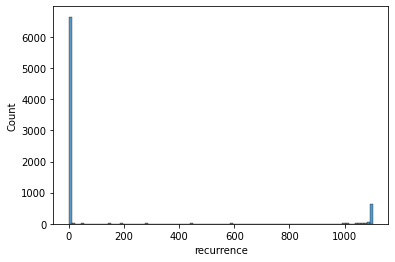

KeyboardInterrupt: 

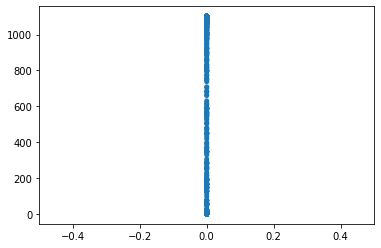

In [165]:
tmp = test.loc[test['spladder_GTEX_on_disk'] != 1
                   & (test['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)
plt.show()
sns.swarmplot(data = tmp, y = 'recurrence')

In [154]:
test['spladder_GTEX_on_disk'] = test['spladder_GTEX_on_disk'].fillna(0)

number of kmers 234


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

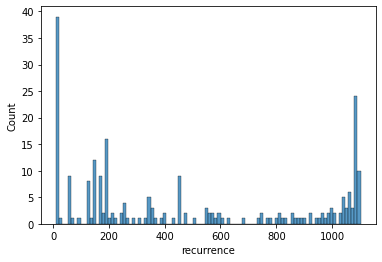

In [156]:
tmp = test.loc[#(test['GTEX_presence'] == 0) &
                  (test['spladder_GTEX_on_disk'] == 0 ) &
                  (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 906


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

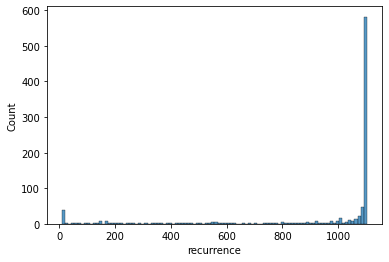

In [157]:
tmp = test.loc[(test['GTEX_presence'] == 0) &
                  (test['spladder_GTEX_on_disk'] == 0 ) &
               #   (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 782


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

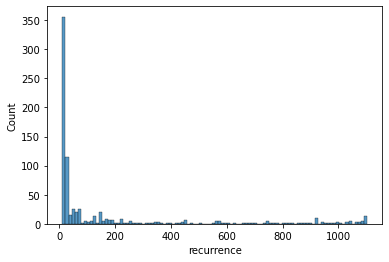

In [158]:
tmp = test.loc[(test['GTEX_presence'] == 0) &
               #   (test['spladder_GTEX_on_disk'] == 0 ) &
                  (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [132]:
tmp.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,0.0,NaN
428,468,56.0,0.0,0.0,1.0,ENSG00000134258.17,117147612_117143904,ACKVIVTTG,0,0,...,144.0,18.0,114.0,40.0,True,0.0,0.0,1068.0,0.0,NaN
1026,1162,94.0,0.0,0.0,1.0,ENSG00000102316.17,54809615_54810117,AEVVRAHRR,1,0,...,37.0,26.0,0.0,82.0,True,0.0,1.0,609.0,0.0,NaN
1029,1166,99.0,1.0,0.0,1.0,ENSG00000102316.17,54809631_54810117,AEVVRAHRR,1,0,...,37.0,26.0,0.0,82.0,True,0.0,1.0,609.0,0.0,NaN
1519,1757,44.0,1.0,0.0,0.0,ENSG00000144749.13,66410137_66407491,AGPVLQQPD,0,0,...,3.0,4.0,0.0,0.0,True,0.0,0.0,803.0,0.0,NaN


number of kmers 151


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

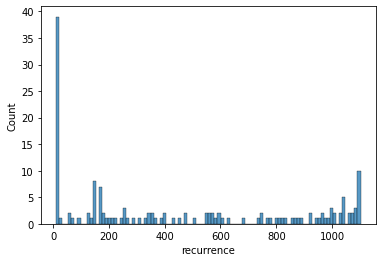

In [178]:
tmp = test.loc[(test['GTEX_presence'] == 0) &
                  (test['spladder_GTEX_on_disk'] == 0 ) &
                  (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [188]:
# Junction annotated kmer !
# GTEX presence manually with graph 
# spldder GTEX junction manual 
tmp = test.loc[(test['GTEX_presence'] == 0) &
                  (test['spladder_GTEX_on_disk'] == 0 ) &
                  (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 30), 
              ]
print(tmp.shape)

if filtered:
    spladder_suffix = 'unfiltered-spladder'
else:
    spladder_suffix = 'filtered-spladder'
if counts: 
    spladder_suffix += '-count'
    
path_save = os.path.join(gene_eq_path, 
                             f'exp_427_kmers_plot2_fix-sample_{spladder_suffix}_noGTEX_noGTEXspladder_noJxAnnot_rec30.csv.gz')
print(path_save)
tmp.to_csv(path_save, compression = 'gzip', index = None)

(621, 1126)
/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp_427_kmers_plot2_fix-sample_unfiltered-spladder_noGTEX_noGTEXspladder_noJxAnnot_rec30.csv.gz


In [191]:
tmp = test.loc[(test['GTEX_presence'] == 0) &
                  (test['spladder_GTEX_on_disk'] == 0 ) &
                  (test['junctionAnnotated_kmer'] == 0) &
                  (test['recurrence'] > 30) &
                  (test['origin'] == '2exons'), 
              ]

In [193]:
tmp

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
428,468,56.0,0.0,0.0,1.0,ENSG00000134258.17,117147612_117143904,ACKVIVTTG,0,0,...,144.0,18.0,114.0,40.0,True,0.0,0.0,1068.0,0.0,NaN
1026,1162,94.0,0.0,0.0,1.0,ENSG00000102316.17,54809615_54810117,AEVVRAHRR,1,0,...,37.0,26.0,0.0,82.0,True,0.0,1.0,609.0,0.0,NaN
1029,1166,99.0,1.0,0.0,1.0,ENSG00000102316.17,54809631_54810117,AEVVRAHRR,1,0,...,37.0,26.0,0.0,82.0,True,0.0,1.0,609.0,0.0,NaN
1519,1757,44.0,1.0,0.0,0.0,ENSG00000144749.13,66410137_66407491,AGPVLQQPD,0,0,...,3.0,4.0,0.0,0.0,True,0.0,0.0,803.0,0.0,NaN
3061,3553,28.0,0.0,0.0,1.0,ENSG00000163382.12,156593968_156593989,APKKSATQL,0,0,...,14.0,0.0,30.0,30.0,True,0.0,0.0,880.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790819,68755,21.0,0.0,0.0,1.0,ENSG00000197858.11,144085352_144085402,SQAMGLALC,0,0,...,19.0,0.0,0.0,48.0,True,0.0,0.0,815.0,0.0,NaN
796771,75521,19.0,0.0,0.0,1.0,ENSG00000105854.13,95410041_95409980,TTVQMKLKW,0,0,...,13.0,16.0,11.0,9.0,True,0.0,0.0,1090.0,0.0,NaN
796772,75522,19.0,0.0,0.0,1.0,ENSG00000105854.13,95410041_95409980,TTVQMKLKW,0,0,...,13.0,16.0,11.0,9.0,True,0.0,0.0,1090.0,0.0,NaN
799493,78749,10.0,0.0,0.0,1.0,ENSG00000184203.8,195516908_195516876,VRCKPCDYS,0,0,...,3.0,1.0,1.0,0.0,True,0.0,0.0,776.0,0.0,NaN


In [ ]:
tmp

In [201]:
tmp[['gene', 'kmer', 'jx_coord', 'recurrence']].drop_duplicates()

,gene,kmer,jx_coord,recurrence
428,ENSG00000134258.17,ACKVIVTTG,117147612_117143904,1068.0
1026,ENSG00000102316.17,AEVVRAHRR,54809615_54810117,609.0
1029,ENSG00000102316.17,AEVVRAHRR,54809631_54810117,609.0
1519,ENSG00000144749.13,AGPVLQQPD,66410137_66407491,803.0
3061,ENSG00000163382.12,APKKSATQL,156593968_156593989,880.0
3085,ENSG00000153201.16,APKSGFEGI,108765521_108765565,73.0
3086,ENSG00000153201.16,APKSGFEGI,108765521_108765569,73.0
19133,ENSG00000125445.11,GPSAARNSV,75265855_75265883,1095.0
20726,ENSG00000104892.17,GTAGDAEQH,45350551_45350620,129.0
26250,ENSG00000168542.14,KDANWMLSS,189010227_189010726,151.0


In [ ]:
# Makse an upset plot?

In [ ]:
path_spladder_hdf5

In [170]:
meta_cols = [ col for col in test.columns if 'TCGA' not in col ] 
cohort = [ col for col in test.columns if 'TCGA' in col ] 

In [202]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'origin',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'spladder_GTEX_on_disk',
 'strand_spladder']